In [15]:
import numpy
import os
import pykitti

# crop function
def crop(image):
    if image.shape[0] > image.shape[1]:
        square_dim = int((image.shape[0]-image.shape[1])/2)
        return image[square_dim:-square_dim,:]
    else:
        square_dim = int((image.shape[1]-image.shape[0])/2)
        return image[:, square_dim:-square_dim]

directory = "/home/sexy/Documents/dataset/sequences/00/image_2/000001.png"

(256, 256, 3)


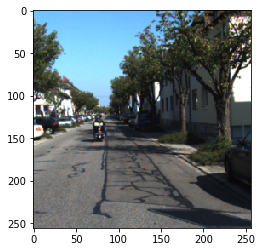

In [21]:
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt

f = imread(directory)
plt.imshow(f)
h = imresize(crop(f), (256,256))
print (h.shape)
plt.imshow(h)
plt.show()